# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import os

if not os.path.exists("lenaRGB.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGB.png --no-check-certificate
if not os.path.exists("lenaRGBSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGBSzum.png --no-check-certificate
lenaszum = cv2.imread('lenaRGBSzum.png')
lenaszum = cv2.cvtColor(lenaszum,cv2.COLOR_BGR2RGB)
lena = cv2.imread('lenaRGB.png')
lena = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)

In [4]:
def median_rgb_filter(img, frame_size):
    one_side = frame_size//2
    filtered_img = np.zeros(img.shape).astype('uint')
    for i in range(one_side,img.shape[0]-one_side):
        for j in range(one_side,img.shape[1]-one_side):
            window = img[i-one_side:i+one_side+1, j-one_side:j+one_side+1]
            distances = np.zeros((frame_size,frame_size))
            for y in range(frame_size):
                for x in range(frame_size):
                    subtracted = window - np.reshape(window[y,x],(1,1,-1))
                    squared = np.square(subtracted)
                    summed = np.sum(squared)
                    distances[y,x] = np.power(summed,0.5)
            filtered_img[i,j] = window[np.unravel_index(np.argmin(distances),distances.shape)]
    return filtered_img

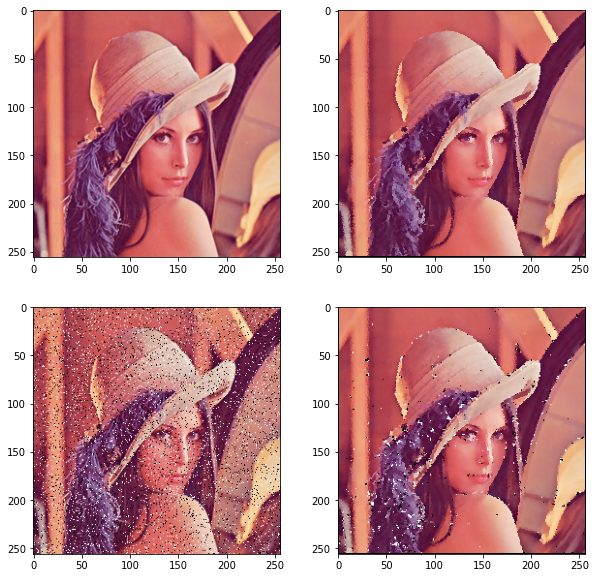

In [5]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i,j in enumerate([lena, lenaszum]):
    axs[i,0].imshow(j)
    axs[i,1].imshow(median_rgb_filter(j,3))